**Primeira etapa**

1.   COLETA
2.   LIMPEZA
3.   PRÉ-PROCESSAMENTO
4.   ANÁLISE EXPLORATÓRIA


In [1]:
# Importar os pacotes básicos
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Criar uma lista dos tickers
tickers = ['^BVSP', '^SP100']

# Baixar e arrumar o DataFrame
dados = yf.download(tickers, start = '2017-01-01', end = '2024-04-01')
dados = dados.stack().reset_index(level=1)
dados.columns.name = None

[*********************100%%**********************]  2 of 2 completed


In [3]:
# Checando se dataframe esta corretamente formatado
dados

,Ticker,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2017-01-02,^BVSP,59589.000000,59589.000000,60227.000000,59371.000000,60227.000000,8.087000e+05
2017-01-03,^BVSP,61814.000000,61814.000000,61815.000000,59631.000000,59631.000000,3.328300e+06
2017-01-03,^SP100,1000.599976,1000.599976,1002.179993,994.789978,997.030029,3.773010e+09
2017-01-04,^BVSP,61589.000000,61589.000000,61940.000000,61302.000000,61811.000000,2.840800e+06
2017-01-04,^SP100,1003.869995,1003.869995,1004.799988,1001.440002,1002.020020,3.768890e+09
...,...,...,...,...,...,...,...
2024-03-26,^SP100,2462.459961,2462.459961,2479.590088,2462.399902,2476.949951,3.871790e+09
2024-03-27,^BVSP,127691.000000,127691.000000,127756.000000,126223.000000,126863.000000,9.918200e+06
2024-03-27,^SP100,2478.820068,2478.820068,2479.209961,2462.530029,2473.489990,3.850500e+09


In [4]:
# Criando filtros para BOVESPA e S&P100
filtro_IBOV = dados['Ticker'] == '^BVSP'
dados_IBOV = dados.copy()
dados_IBOV = dados_IBOV[filtro_IBOV]

filtro_SP100 = dados['Ticker'] == '^SP100'
dados_SP100 = dados.copy()
dados_SP100 = dados_SP100[filtro_SP100]

In [5]:
# Checando dimensoes de ambos os dados da BOVESPA
dados_IBOV.shape

(1794, 7)

In [6]:
# Mesmo acima, para S&P100
dados_SP100.shape

(1821, 7)

In [7]:
# Os dados da BOVESPA possuem menos linhas, checar se ha dados nulos em ambos
dados_IBOV.isnull().sum()
# Nao ha dados nulos!

Ticker       0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [8]:
dados_SP100.isnull().sum()
# No S&P100 tambem nao ha dados nulos!

Ticker       0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [9]:
# Checando algumas estatisticas descritivas sobre ambas as series temporais
dados_IBOV.describe() # Bovespa

,Adj Close,Close,High,Low,Open,Volume
count,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000,1.794000e+03
mean,99612.466555,99612.466555,100489.836678,98688.960981,99576.638239,8.028470e+06
std,18785.862928,18785.862928,18837.246198,18724.267669,18797.955962,4.411217e+06
min,59589.000000,59589.000000,60227.000000,59371.000000,59631.000000,0.000000e+00
25%,84674.000000,84674.000000,85496.000000,83825.500000,84624.750000,3.982825e+06
50%,103445.000000,103445.000000,104343.000000,102419.500000,103423.000000,8.155650e+06
75%,114339.750000,114339.750000,115217.750000,113146.750000,114335.500000,1.124465e+07
max,134194.000000,134194.000000,134392.000000,133832.000000,134194.000000,2.602930e+07


In [10]:
# Agora para S&P100
dados_SP100.describe()

,Adj Close,Close,High,Low,Open,Volume
count,1821.000000,1821.000000,1821.000000,1821.000000,1821.000000,1.821000e+03
mean,1578.990802,1578.990802,1587.811125,1568.960999,1578.572361,4.084911e+09
std,390.365457,390.365457,392.553768,387.728524,390.042799,1.010187e+09
min,1000.109985,1000.109985,1002.179993,994.789978,997.030029,1.296530e+09
25%,1221.790039,1221.790039,1226.050049,1215.250000,1220.920044,3.460260e+09
50%,1530.280029,1530.280029,1541.609985,1514.479980,1528.800049,3.877700e+09
75%,1908.859985,1908.859985,1918.609985,1900.500000,1911.989990,4.452460e+09
max,2479.419922,2479.419922,2492.139893,2476.919922,2490.010010,9.976520e+09


In [11]:
# Checando se ha diferencas entre Close e Adj Close
sum(dados_IBOV['Close'] != dados_IBOV['Adj Close']) # Bovespa
# Nao ha diferenca!

0

In [12]:
sum(dados_SP100['Close'] != dados_SP100['Adj Close']) # S&P100
# Nao ha diferenca

0

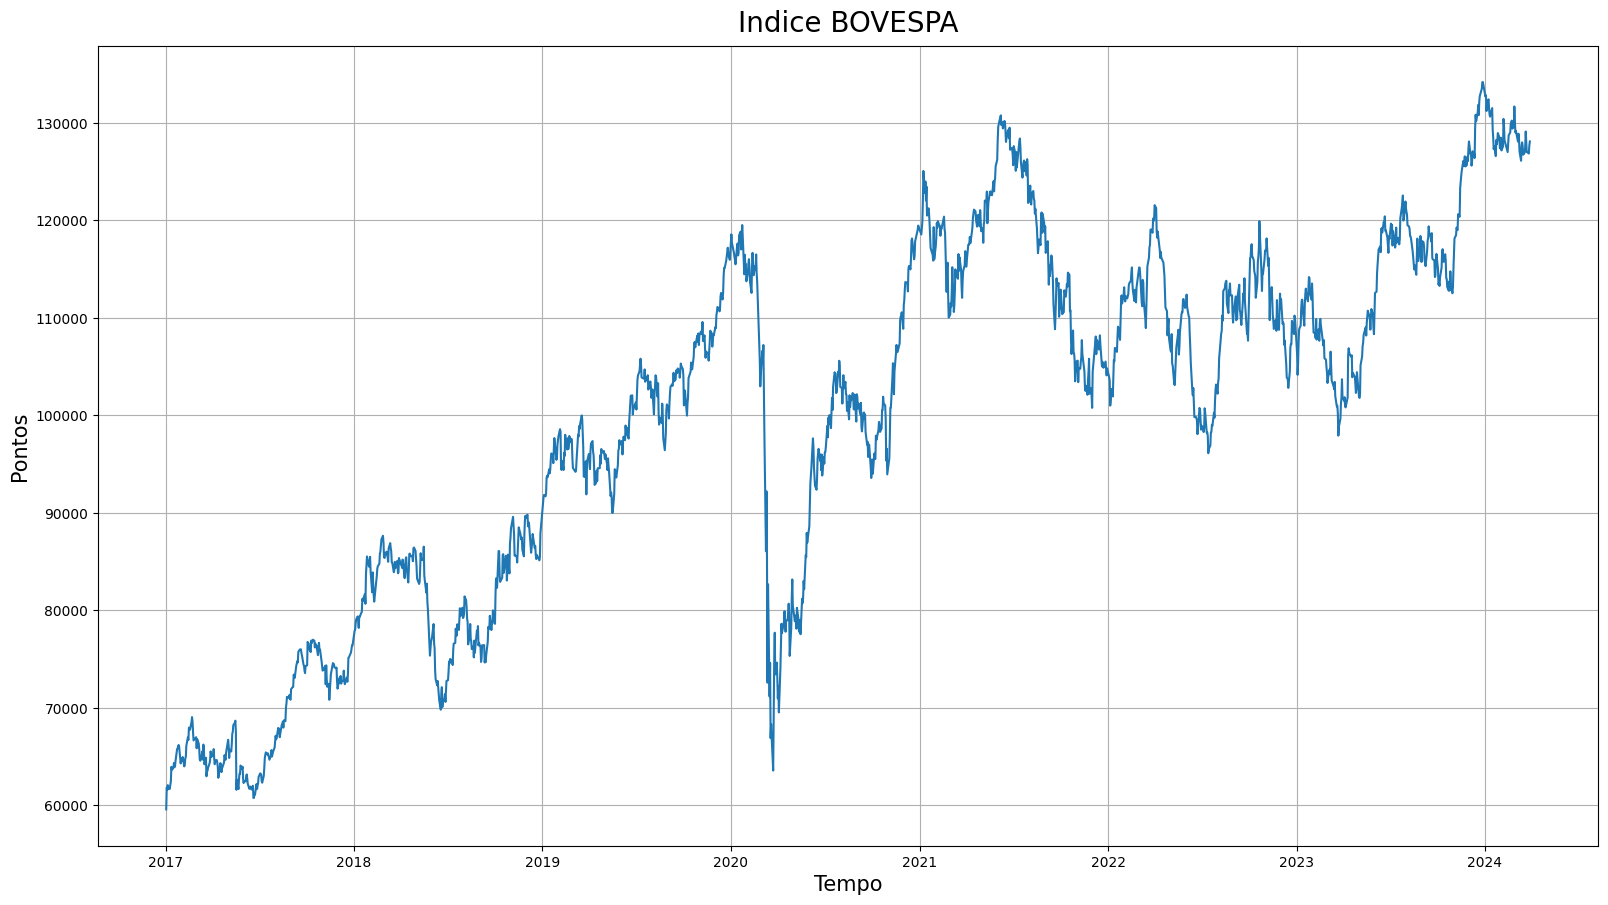

In [13]:
# Plotar BOVESPA
fig1 = plt.figure(figsize=(15, 8))
eixo1 = fig1.add_axes([0, 0, 1, 1])

eixo1.plot(dados_IBOV['Close'])
eixo1.set_title('Indice BOVESPA', fontsize=20, pad=10)
eixo1.set_xlabel('Tempo', fontsize=15)
eixo1.set_ylabel('Pontos', fontsize=15)
eixo1.grid()

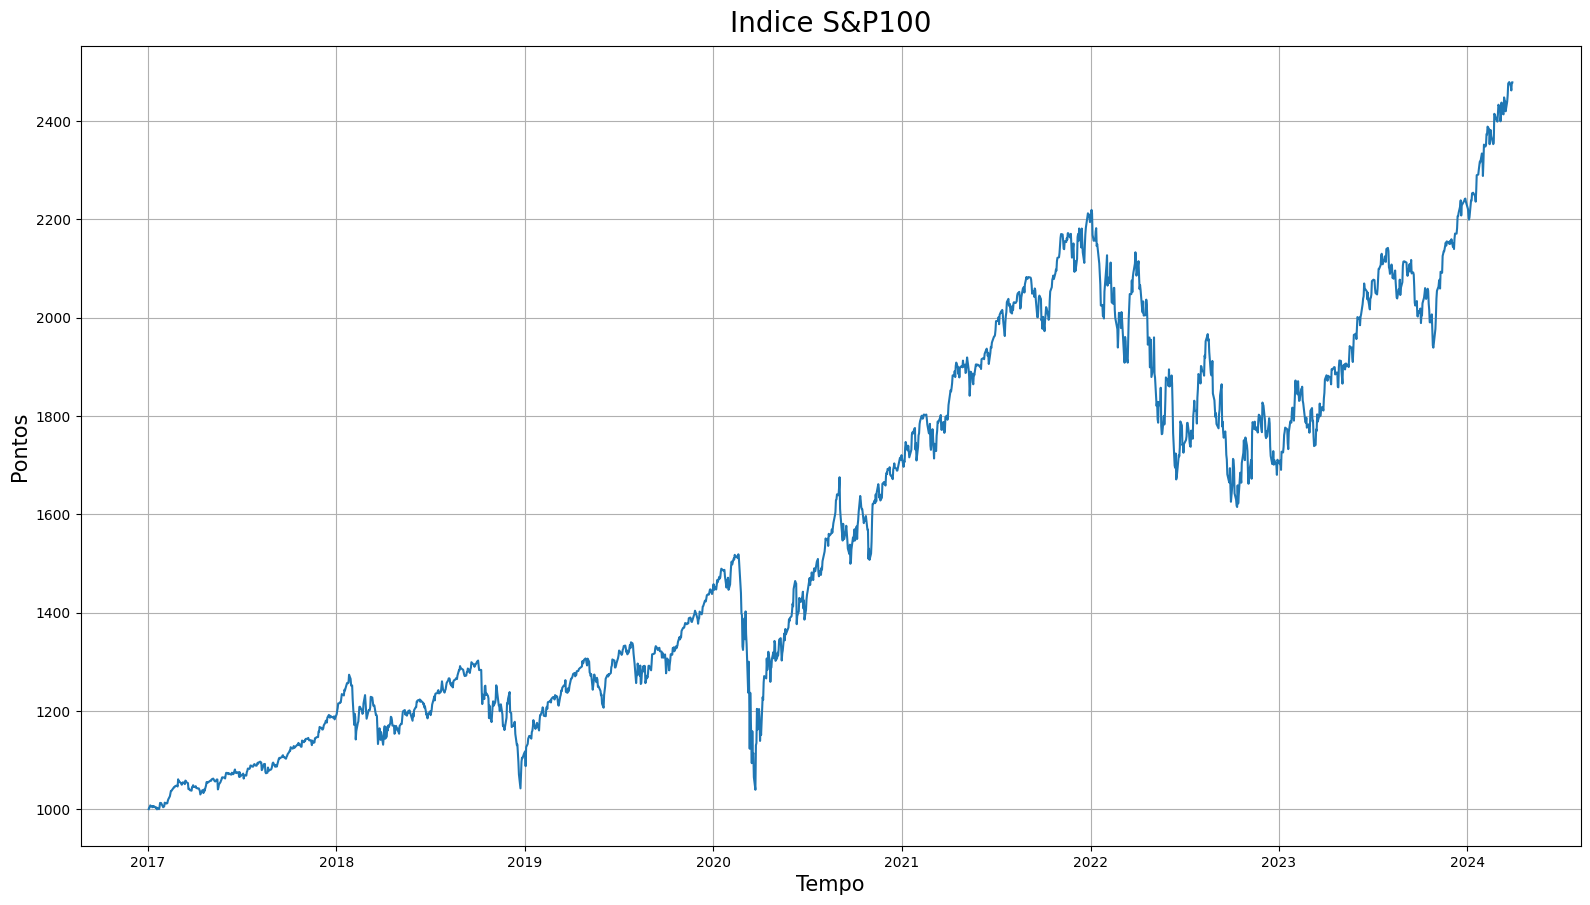

In [14]:
# Plotar BOVESPA
fig1 = plt.figure(figsize=(15, 8))
eixo1 = fig1.add_axes([0, 0, 1, 1])

eixo1.plot(dados_SP100['Close'])
eixo1.set_title('Indice S&P100', fontsize=20, pad=10)
eixo1.set_xlabel('Tempo', fontsize=15)
eixo1.set_ylabel('Pontos', fontsize=15)
eixo1.grid()

In [15]:
# Calcular amplitude absoluta e relativa diária de ambos

dados_IBOV['Amplitude'] = dados_IBOV['High'] - dados_IBOV['Low']
dados_IBOV['Amplitude relativa'] = dados_IBOV['Amplitude'] / dados_IBOV['Close'] 

dados_SP100['Amplitude'] = dados_SP100['High'] - dados_SP100['Low']
dados_SP100['Amplitude relativa'] = dados_SP100['Amplitude'] / dados_SP100['Close']

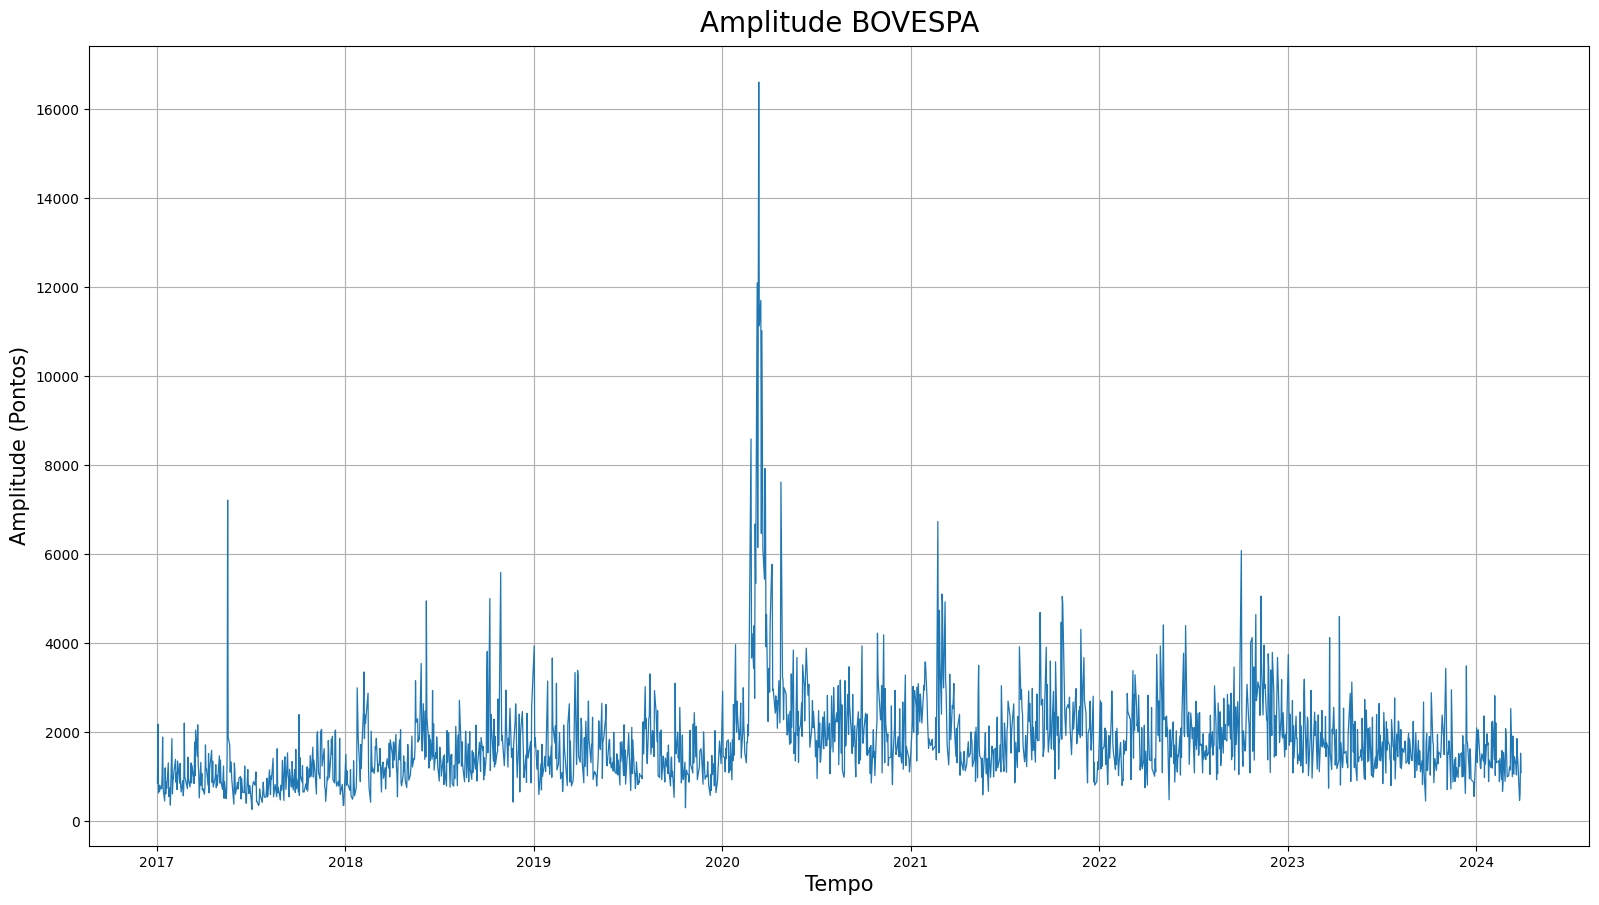

In [184]:
# Plotar amplitude para BOVESPA
fig1 = plt.figure(figsize=(15, 8))
eixo1 = fig1.add_axes([0, 0, 1, 1])

eixo1.plot(dados_IBOV['Amplitude'], lw=0.9)
eixo1.set_title('Amplitude BOVESPA', fontsize=20, pad=10)
eixo1.set_xlabel('Tempo', fontsize=15)
eixo1.set_ylabel('Amplitude (Pontos)', fontsize=15)
eixo1.grid()

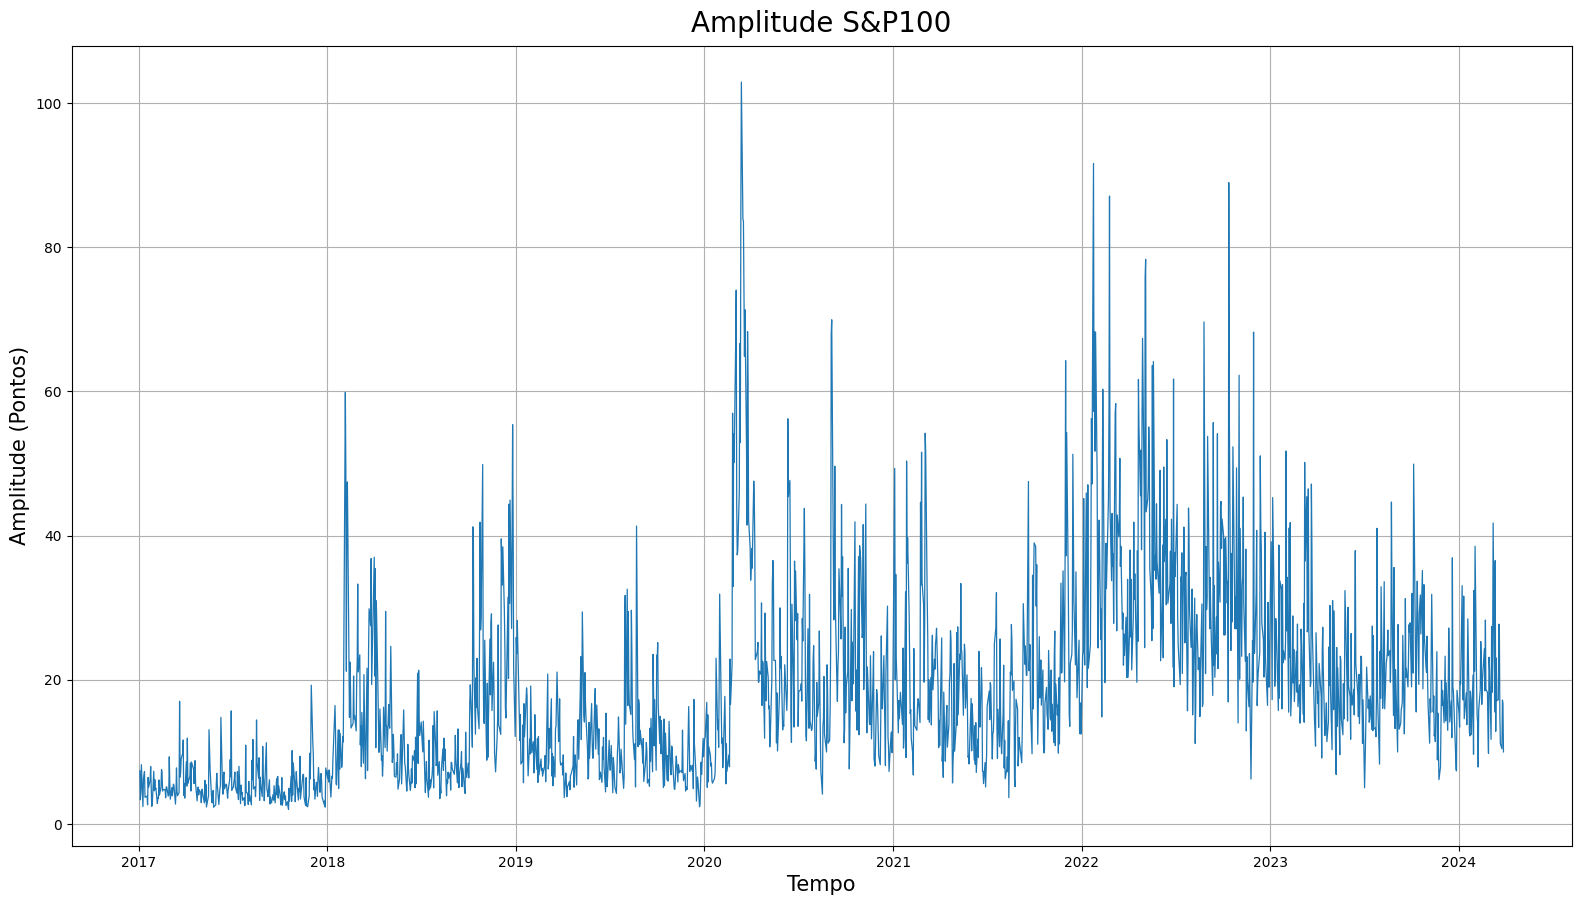

In [185]:
# Plotar amplitude para SP100
fig2 = plt.figure(figsize=(15, 8))
eixo2 = fig2.add_axes([0, 0, 1, 1])

eixo2.plot(dados_SP100['Amplitude'], lw=0.9)
eixo2.set_title('Amplitude S&P100', fontsize=20, pad=10)
eixo2.set_xlabel('Tempo', fontsize=15)
eixo2.set_ylabel('Amplitude (Pontos)', fontsize=15)
eixo2.grid()

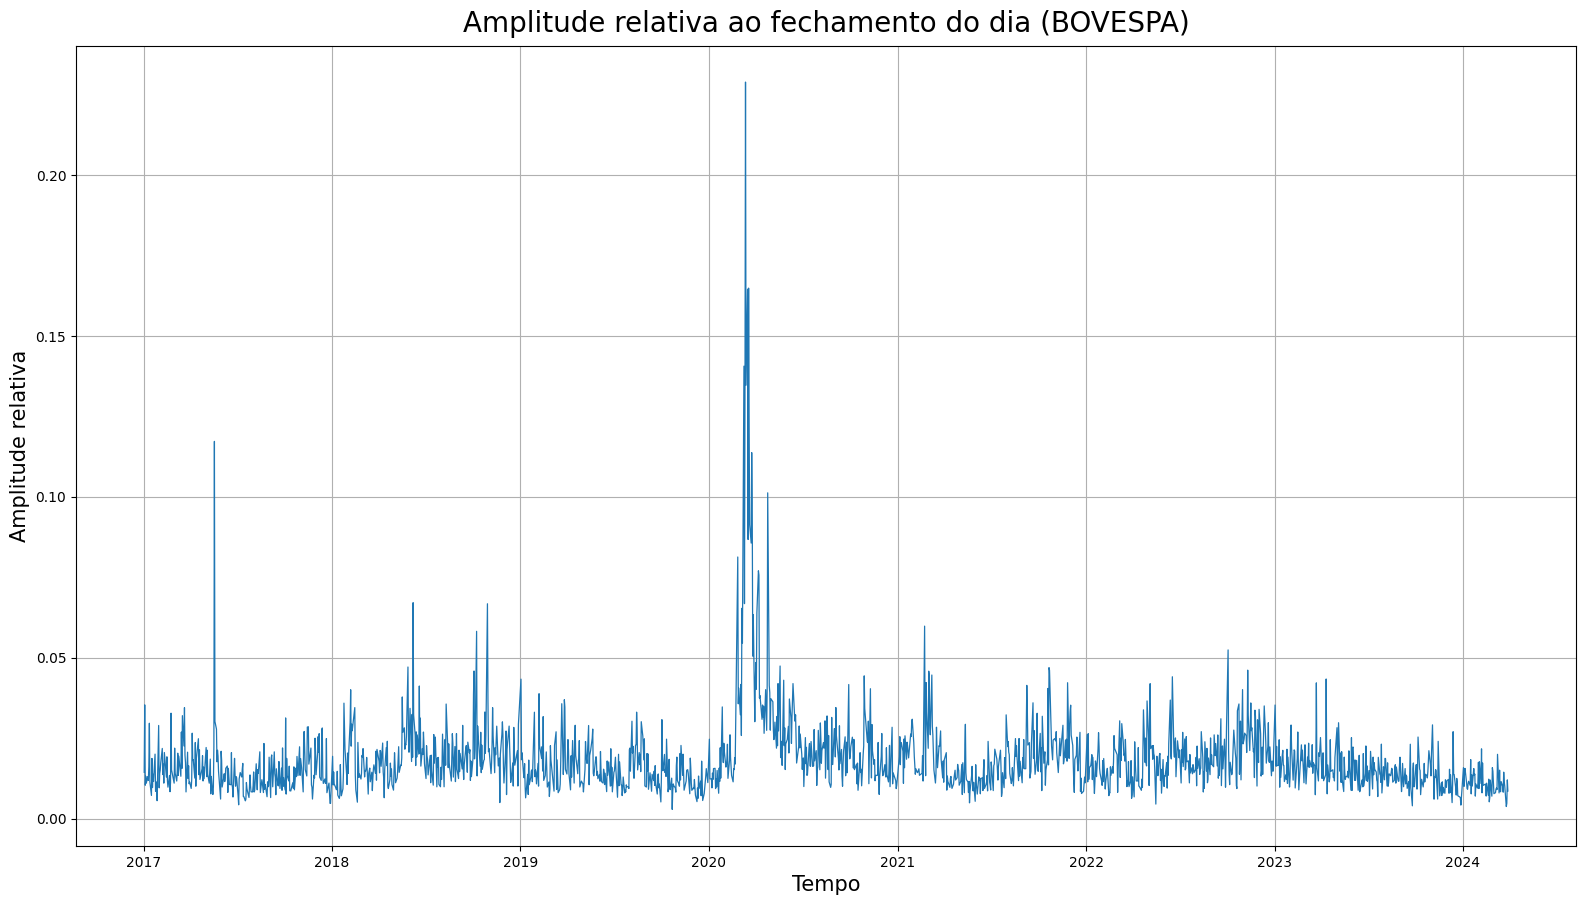

In [186]:
# Plotar amplitude realtiva para BOVESPA
fig3 = plt.figure(figsize=(15, 8))
eixo3 = fig3.add_axes([0, 0, 1, 1])

eixo3.plot(dados_IBOV['Amplitude relativa'], lw=0.9)
eixo3.set_title('Amplitude relativa ao fechamento do dia (BOVESPA)', fontsize=20, pad=10)
eixo3.set_xlabel('Tempo', fontsize=15)
eixo3.set_ylabel('Amplitude relativa', fontsize=15)
eixo3.grid()

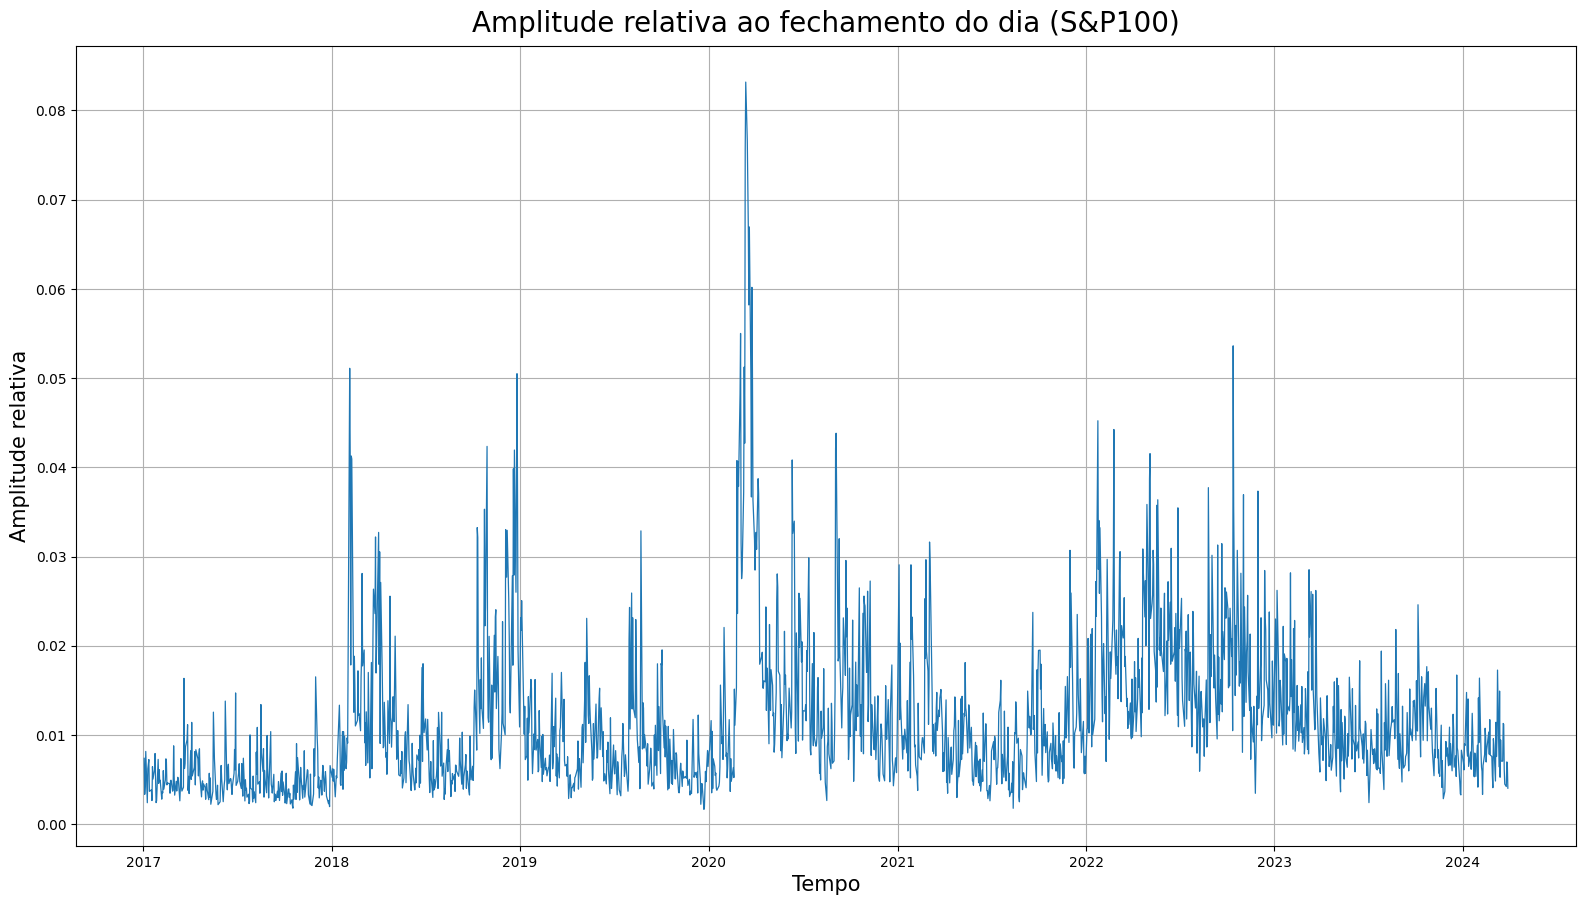

In [187]:
# Plotar amplitude realtiva para S&P100
fig4 = plt.figure(figsize=(15, 8))
eixo4 = fig4.add_axes([0, 0, 1, 1])

eixo4.plot(dados_SP100['Amplitude']/dados_SP100['Close'], lw=0.9)
eixo4.set_title('Amplitude relativa ao fechamento do dia (S&P100)', fontsize=20, pad=10)
eixo4.set_xlabel('Tempo', fontsize=15)
eixo4.set_ylabel('Amplitude relativa', fontsize=15)
eixo4.grid()

In [189]:
# Analisar média e mediana da ampllitude relativa
media_IBOV = dados_IBOV['Amplitude relativa'].mean()
mediana_IBOV = dados_IBOV['Amplitude relativa'].median()

media_SP100 = dados_SP100['Amplitude relativa'].mean()
mediana_SP100 = dados_SP100['Amplitude relativa'].median()

print(f'Média Amplitude relativa BOVESPA: {media_IBOV}\nMediana Amplitude relativa BOVESPA: {mediana_IBOV}')
print('')
print(f'Média Amplitude relativa SP100: {media_SP100}\nMediana Amplitude relativa SP100: {mediana_SP100}')

Média Amplitude relativa BOVESPA: 0.018513943179763254
Mediana Amplitude relativa BOVESPA: 0.015855776343054073

Média Amplitude relativa SP100: 0.01182053042501477
Mediana Amplitude relativa SP100: 0.009412698921971253


In [107]:
# Calculando o retorno de ambos
def calculo_retorno(x): # Função utilizada para o cálculo
  retorno = (x/x.shift())-1
  return(retorno)

retornos_IBOV = dados_IBOV.groupby('Ticker').apply(lambda x: calculo_retorno(x['Close'])).T # Criando um Dataframe somente com os retornos
retornos_IBOV.dropna(inplace=True) # Tratando a primeira linha nula

retornos_SP100 = dados_SP100.groupby('Ticker').apply(lambda x: calculo_retorno(x['Close'])).T 
retornos_SP100.dropna(inplace=True) # Tratando a primeira linha nula

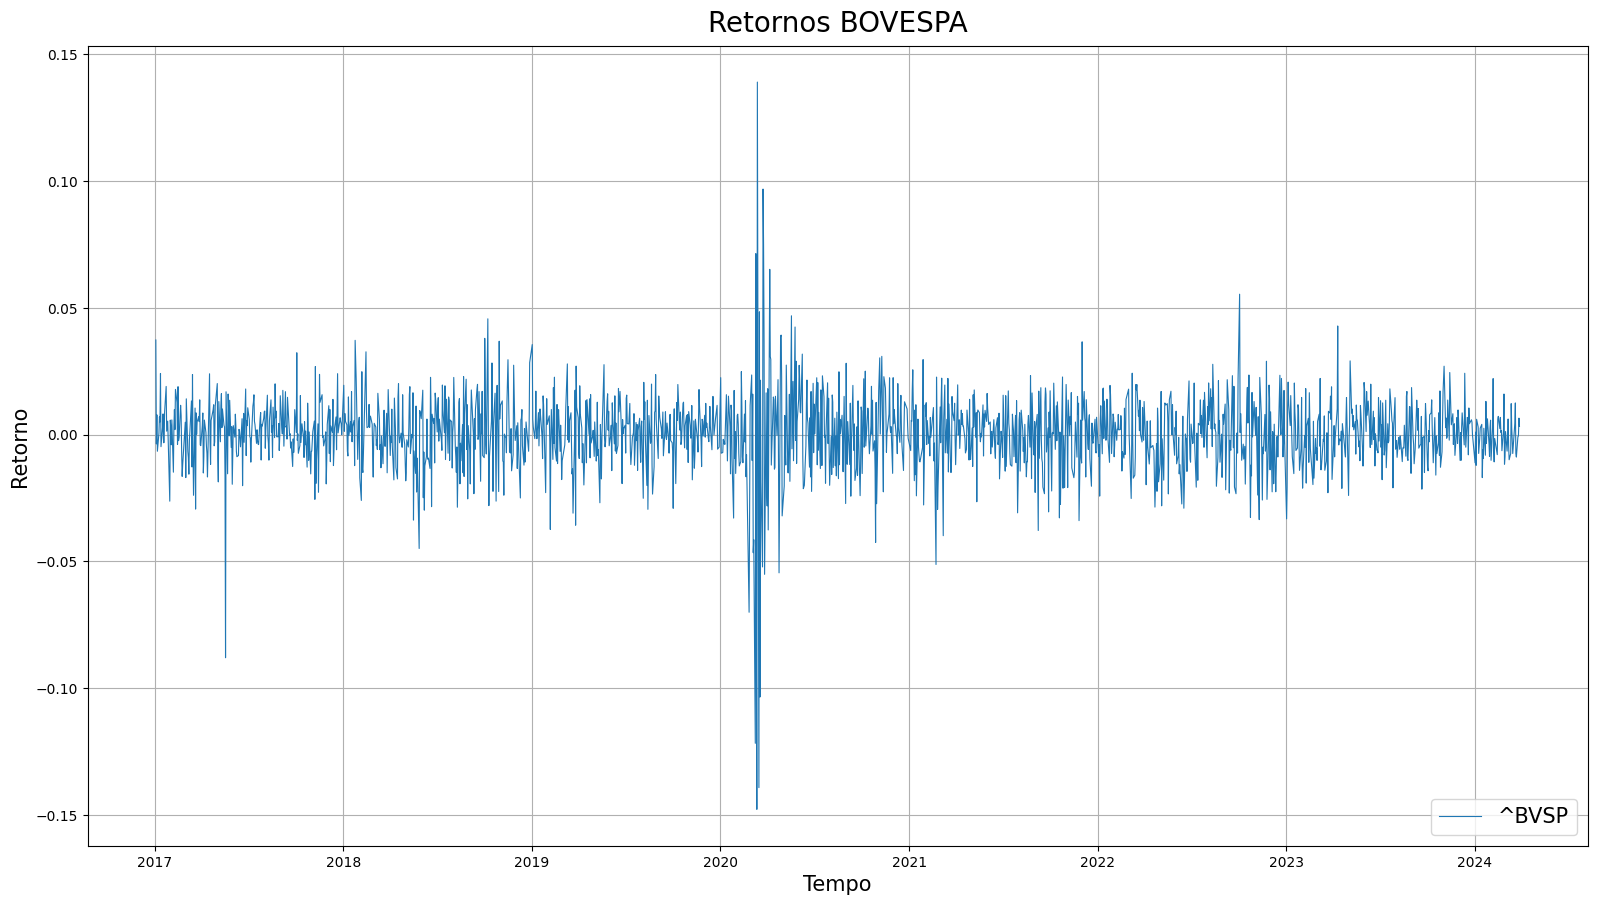

In [22]:
# Plotando retorno para BOVESPA
fig = plt.figure(figsize=(15, 8))
eixo = fig.add_axes([0, 0, 1, 1])

eixo.plot(retornos_IBOV, lw=0.8)
eixo.set_title('Retornos BOVESPA', fontsize=20, pad=10)
eixo.set_xlabel('Tempo', fontsize=15)
eixo.set_ylabel('Retorno', fontsize=15)
eixo.legend(['^BVSP'], fontsize=15, loc='lower right')
eixo.grid()

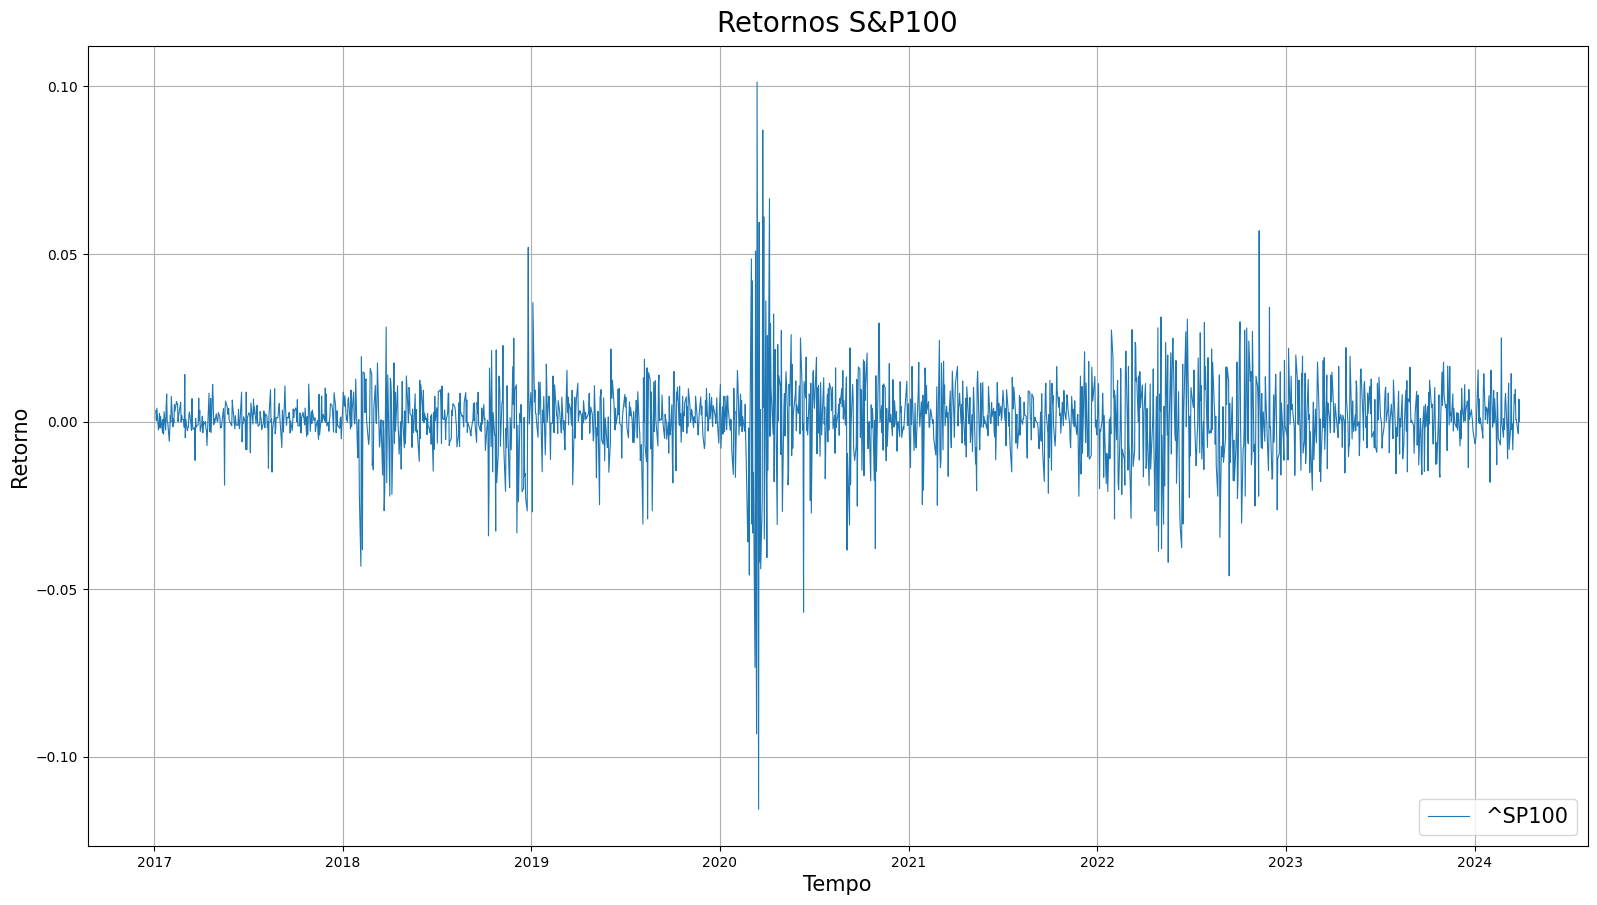

In [23]:
# Plotando retorno para S&P100
fig = plt.figure(figsize=(15, 8))
eixo = fig.add_axes([0, 0, 1, 1])

eixo.plot(retornos_SP100, lw=0.8)
eixo.set_title('Retornos S&P100', fontsize=20, pad=10)
eixo.set_xlabel('Tempo', fontsize=15)
eixo.set_ylabel('Retorno', fontsize=15)
eixo.legend(['^SP100'], fontsize=15, loc='lower right')
eixo.grid()

In [24]:
# Checar se ha uma volatilidade maior nos retornos de um índice em relação a outro
print(f'Desvio padrão BOVESPA:\n{retornos_IBOV.std()}')
print('')
print(f'Desvio padrão SP&100:\n{retornos_SP100.std()}')
# Não parece haver significância estatística na volatilidade.

Desvio padrão BOVESPA:
Ticker
^BVSP    0.015497
dtype: float64

Desvio padrão SP&100:
Ticker
^SP100    0.012193
dtype: float64


In [25]:
# Calcular retornos acumulados
# Juntando BOVESPA com o S&P100
completo = retornos_IBOV.join(retornos_SP100, how='outer')
completo = completo.fillna(0) # Tratando dados nulos (numero de datas é discrepante)

#Retornos acumulados começando com 100
valor_inicial = 100
acumulado_indices = completo.apply(lambda x: valor_inicial * (1+x).cumprod())

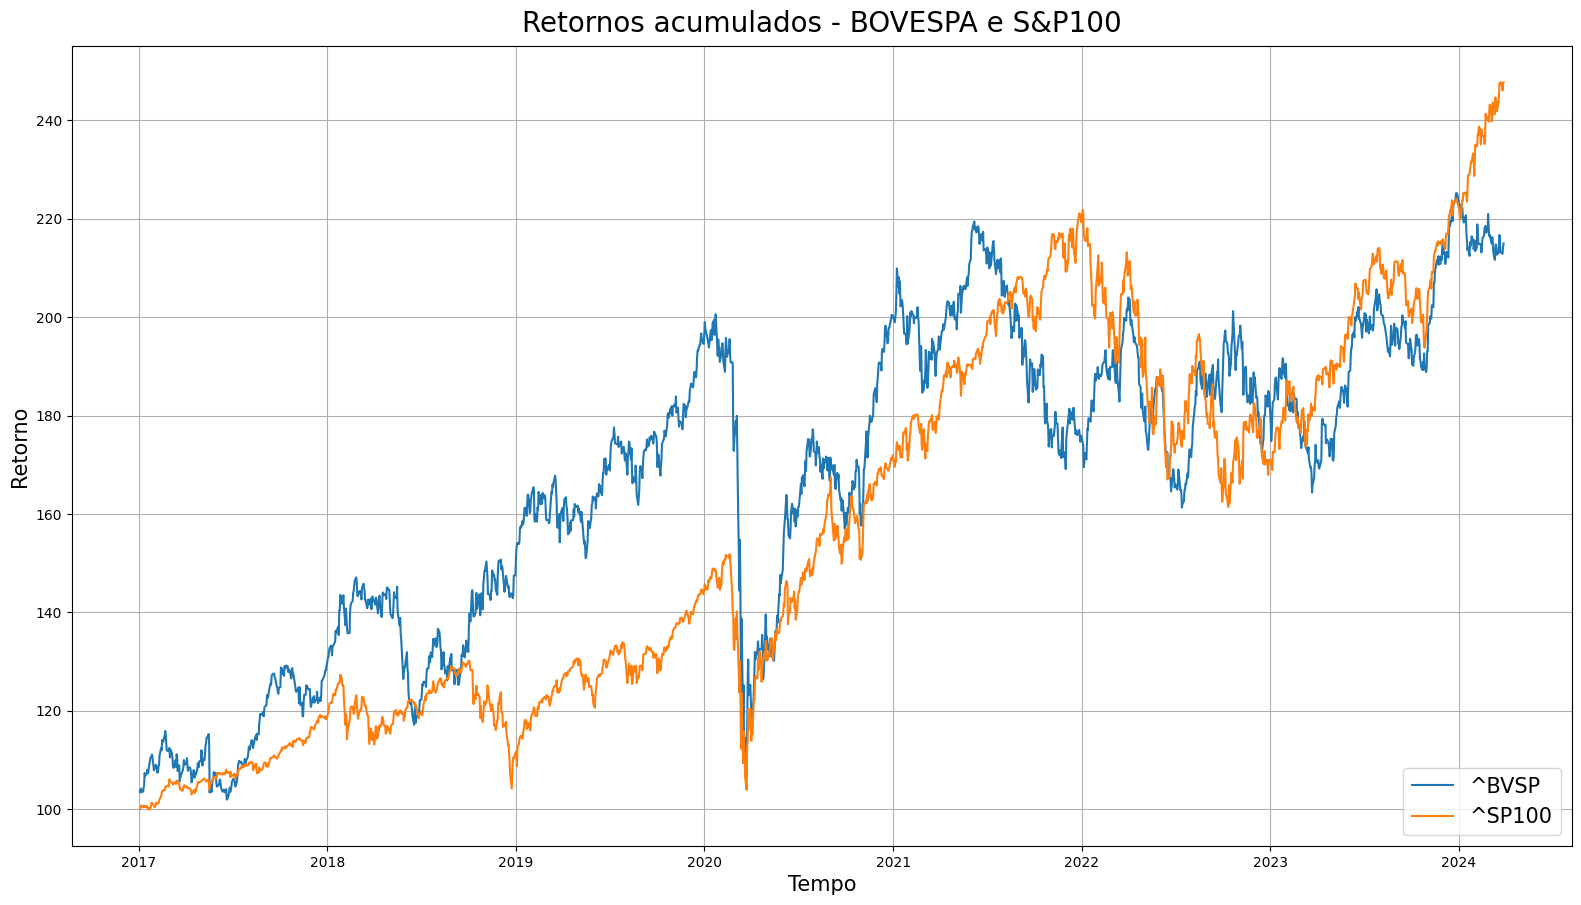

In [26]:
# Plotar retornos acumulados BOVESPA e S&P100
fig = plt.figure(figsize=(15, 8))
eixo = fig.add_axes([0, 0, 1, 1])

eixo.plot(acumulado_indices)
eixo.set_title('Retornos acumulados - BOVESPA e S&P100', fontsize=20, pad=10)
eixo.set_xlabel('Tempo', fontsize=15)
eixo.set_ylabel('Retorno', fontsize=15)
eixo.legend(['^BVSP', '^SP100'], loc='lower right', fontsize=15)
eixo.grid()

In [27]:
# Importando as ações
# Começando pela BOVESPA, levantamento de todas as ações que fizeram parte do índice de 2017 para cá (e não faliram)
# Definir todas as listas
lista_ibov = [
              ['ABEV3', 'AESB3', 'ALOS3', 'ALPA4', 'ALSO3', 'AMBP3', 'AMER3', 'ANIM3', 'ARZZ3', 'ASAI3', 'AURE3', 'AZUL4', 'B3SA3', 'BBAS3', 'BBDC3', 'BBDC4', 'BBSE3', 'BEEF3', 'BHIA3', 'BIDI11', 'BLAU3', 'BPAC11', 'BPAN4', 'BRAP4', 'BRFS3', 'BRKM5', 'BRML3', 'CASH3', 'CBAV3', 'CCRO3', 'CIEL3', 'CLSA3', 'CMIG4', 'CMIN3', 'COGN3', 'CPFE3', 'CPLE6', 'CRFB3', 'CSAN3', 'CSNA3', 'CVCB3', 'CXSE3', 'CYRE3', 'DASA3', 'DXCO3', 'ECOR3', 'EGIE3', 'ELET3', 'ELET6', 'EMBR3', 'ENBR3', 'ENEV3', 'ENGI11', 'EQTL3', 'ESPA3', 'EVEN3', 'EZTC3', 'FESA4', 'FLRY3', 'GGBR4', 'GMAT3', 'GNDI3', 'GOAU4', 'GOLL4', 'HAPV3', 'HYPE3', 'IGTI11', 'IRBR3', 'ITSA4', 'ITUB3', 'ITUB4', 'JBSS3', 'JHSF3', 'KLBN11', 'LAME4', 'LAVV3', 'LCAM3', 'LJQQ3', 'LREN3', 'LWSA3', 'MATD3', 'MDIA3', 'MGLU3', 'MILS3', 'MRFG3', 'MRVE3', 'MULT3', 'MYPK3', 'NEOE3', 'NTCO3', 'ODPV3', 'ONCO3', 'PCAR3', 'PETR3', 'PETR4', 'PETZ3', 'PGMN3', 'POSI3', 'PRIO3', 'QUAL3', 'RADL3', 'RAIL3', 'RAIZ4', 'RDOR3', 'RECV3', 'RENT3', 'RRRP3', 'SANB11', 'SAPR11', 'SBFG3', 'SBSP3', 'SEER3', 'SEQL3', 'SLCE3', 'SMTO3', 'SOMA3', 'SQIA3', 'SULA11', 'SUZB3', 'TAEE11', 'TEND3', 'TIMS3', 'TOTS3', 'TRPL4', 'UGPA3', 'USIM5', 'VALE3', 'VAMO3', 'VBBR3', 'VIIA3', 'VIVA3', 'VIVT3', 'VLID3', 'WEGE3', 'YDUQ3'],
              ['ABEV3', 'ALPA4', 'AMER3', 'ASAI3', 'AZUL4', 'B3SA3', 'BBAS3', 'BBDC3', 'BBDC4', 'BBSE3', 'BEEF3', 'BIDI11', 'BIDI4', 'BPAC11', 'BPAN4', 'BRAP4', 'BRDT3', 'BRFS3', 'BRKM5', 'BRML3', 'BTOW3', 'CASH3', 'CCRO3', 'CIEL3', 'CMIG4', 'COGN3', 'CPFE3', 'CPLE6', 'CRFB3', 'CSAN3', 'CSNA3', 'CVCB3', 'CYRE3', 'DXCO3', 'ECOR3', 'EGIE3', 'ELET3', 'ELET6', 'EMBR3', 'ENBR3', 'ENEV3', 'ENGI11', 'EQTL3', 'EZTC3', 'FLRY3', 'GGBR4', 'GNDI3', 'GOAU4', 'GOLL4', 'HAPV3', 'HGTX3', 'HYPE3', 'IGTA3', 'IRBR3', 'ITSA4', 'ITUB4', 'JBSS3', 'JHSF3', 'KLBN11', 'LAME4', 'LCAM3', 'LREN3', 'LWSA3', 'MGLU3', 'MRFG3', 'MRVE3', 'MULT3', 'NTCO3', 'PCAR3', 'PETR3', 'PETR4', 'PETZ3', 'PRIO3', 'QUAL3', 'RADL3', 'RAIL3', 'RDOR3', 'RENT3', 'SANB11', 'SBSP3', 'SULA11', 'SUZB3', 'TAEE11', 'TIMP3', 'TIMS3', 'TOTS3', 'UGPA3', 'USIM5', 'VALE3', 'VIIA3', 'VIVT3', 'VIVT4', 'VVAR3', 'WEGE3', 'YDUQ3'], ['ABEV3', 'AZUL4', 'B3SA3', 'BBAS3', 'BBDC3', 'BBDC4', 'BBSE3', 'BPAC11', 'BRAP4', 'BRDT3', 'BRFS3', 'BRKM5', 'BRML3', 'BTOW3', 'CCRO3', 'CIEL3', 'CMIG4', 'CPLE6', 'CRFB3', 'CSAN3', 'CSNA3', 'CVCB3', 'CYRE3', 'ECOR3', 'EGIE3', 'ELET3', 'ELET6', 'EMBR3', 'ENBR3', 'EQTL3', 'ESTC3', 'FIBR3', 'FLRY3', 'GGBR4', 'GNDI3', 'GOAU4', 'GOLL4', 'HAPV3', 'HYPE3', 'IGTA3', 'IRBR3', 'ITSA4', 'ITUB4', 'JBSS3', 'KLBN11', 'KROT3', 'LAME4', 'LOGG3', 'LREN3', 'MGLU3', 'MRFG3', 'MRVE3', 'MULT3', 'NATU3', 'NTCO3', 'PCAR4', 'PETR3', 'PETR4', 'QUAL3', 'RADL3', 'RAIL3', 'RENT3', 'SANB11', 'SBSP3', 'SMLS3', 'SULA11', 'SUZB3', 'TAEE11', 'TIMP3', 'TOTS3', 'UGPA3', 'USIM5', 'VALE3', 'VIVT4', 'VVAR11', 'VVAR3', 'WEGE3', 'YDUQ3'],
              ['ABEV3', 'B3SA3', 'BBAS3', 'BBDC3', 'BBDC4', 'BBSE3', 'BRAP4', 'BRFS3', 'BRKM5', 'BRML3', 'BTOW3', 'BVMF3', 'CCRO3', 'CIEL3', 'CMIG4', 'CPFE3', 'CPLE6', 'CSAN3', 'CSNA3', 'CTIP3', 'CVCB3', 'CYRE3', 'ECOR3', 'EGIE3', 'ELET3', 'ELET6', 'EMBR3', 'ENBR3', 'EQTL3', 'ESTC3', 'FIBR3', 'FLRY3', 'GGBR4', 'GOAU4', 'GOLL4', 'HYPE3', 'IGTA3', 'ITSA4', 'ITUB4', 'JBSS3', 'KLBN11', 'KROT3', 'LAME4', 'LREN3', 'MGLU3', 'MRFG3', 'MRVE3', 'MULT3', 'NATU3', 'PCAR4', 'PETR3', 'PETR4', 'QUAL3', 'RADL3', 'RAIL3', 'RENT3', 'RUMO3', 'SANB11', 'SAPR11', 'SBSP3', 'SMLE3', 'SMLS3', 'SUZB3', 'SUZB5', 'TAEE11', 'TIMP3', 'UGPA3', 'USIM5', 'VALE3', 'VALE5', 'VIVT4', 'VVAR11', 'WEGE3']
              ]

# Unificar todas as listas
tickers_IBOV = list(set().union(*lista_ibov))

# Ordenar a lista resultante e adicionar ".SA"
tickers_IBOV.sort()
tickers_IBOV = [ticker + '.SA' for ticker in tickers_IBOV]

print(tickers_IBOV)


['ABEV3.SA', 'AESB3.SA', 'ALOS3.SA', 'ALPA4.SA', 'ALSO3.SA', 'AMBP3.SA', 'AMER3.SA', 'ANIM3.SA', 'ARZZ3.SA', 'ASAI3.SA', 'AURE3.SA', 'AZUL4.SA', 'B3SA3.SA', 'BBAS3.SA', 'BBDC3.SA', 'BBDC4.SA', 'BBSE3.SA', 'BEEF3.SA', 'BHIA3.SA', 'BIDI11.SA', 'BIDI4.SA', 'BLAU3.SA', 'BPAC11.SA', 'BPAN4.SA', 'BRAP4.SA', 'BRDT3.SA', 'BRFS3.SA', 'BRKM5.SA', 'BRML3.SA', 'BTOW3.SA', 'BVMF3.SA', 'CASH3.SA', 'CBAV3.SA', 'CCRO3.SA', 'CIEL3.SA', 'CLSA3.SA', 'CMIG4.SA', 'CMIN3.SA', 'COGN3.SA', 'CPFE3.SA', 'CPLE6.SA', 'CRFB3.SA', 'CSAN3.SA', 'CSNA3.SA', 'CTIP3.SA', 'CVCB3.SA', 'CXSE3.SA', 'CYRE3.SA', 'DASA3.SA', 'DXCO3.SA', 'ECOR3.SA', 'EGIE3.SA', 'ELET3.SA', 'ELET6.SA', 'EMBR3.SA', 'ENBR3.SA', 'ENEV3.SA', 'ENGI11.SA', 'EQTL3.SA', 'ESPA3.SA', 'ESTC3.SA', 'EVEN3.SA', 'EZTC3.SA', 'FESA4.SA', 'FIBR3.SA', 'FLRY3.SA', 'GGBR4.SA', 'GMAT3.SA', 'GNDI3.SA', 'GOAU4.SA', 'GOLL4.SA', 'HAPV3.SA', 'HGTX3.SA', 'HYPE3.SA', 'IGTA3.SA', 'IGTI11.SA', 'IRBR3.SA', 'ITSA4.SA', 'ITUB3.SA', 'ITUB4.SA', 'JBSS3.SA', 'JHSF3.SA', 'KLBN11.SA'

In [28]:
# Baixando e arrumando o DataFrame
df_acoes_ibov = yf.download(tickers_IBOV, start = '2017-01-01', end = '2024-04-01')
df_acoes_ibov = df_acoes_ibov.stack().reset_index(level=1)
df_acoes_ibov.columns.name = None


[*********************100%%**********************]  157 of 157 completed

28 Failed downloads:
['BRDT3.SA', 'VVAR3.SA', 'VIVT4.SA', 'LCAM3.SA', 'VIIA3.SA', 'ESTC3.SA', 'IGTA3.SA', 'TIMP3.SA', 'BIDI11.SA', 'GNDI3.SA', 'HGTX3.SA', 'SMLS3.SA', 'BTOW3.SA', 'LAME4.SA', 'SQIA3.SA', 'ENBR3.SA', 'KROT3.SA', 'NATU3.SA', 'BRML3.SA', 'PCAR4.SA', 'BIDI4.SA', 'ALSO3.SA', 'SULA11.SA']: Exception('%ticker%: No timezone found, symbol may be delisted')
['RUMO3.SA', 'CTIP3.SA', 'SMLE3.SA', 'BVMF3.SA', 'SUZB5.SA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2017-01-01 -> 2024-04-01)')


In [64]:
df_acoes_ibov

,Ticker,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2017-01-02,ABEV3.SA,12.610021,16.309999,16.660000,16.260000,16.340000,4265400.0
2017-01-02,ALPA4.SA,7.343465,7.865927,8.033797,7.865927,8.001822,147363.0
2017-01-02,AMER3.SA,9.567108,9.759272,9.874087,9.625322,9.759272,204955.0
2017-01-02,ANIM3.SA,4.344816,4.416666,4.566666,4.416666,4.520000,70200.0
2017-01-02,ARZZ3.SA,21.125704,25.049999,25.059999,24.410000,25.059999,60200.0
...,...,...,...,...,...,...,...
2024-03-28,VIVA3.SA,25.400000,25.400000,25.959999,25.040001,25.650000,3785800.0
2024-03-28,VIVT3.SA,49.527782,50.599998,50.669998,50.009998,50.500000,2209300.0
2024-03-28,VLID3.SA,18.169945,18.490000,18.840000,18.110001,18.190001,397300.0


In [190]:
# Puxando as 3 maiores acoes no ultimo dia de fechamento
lista_maiores_ibov = df_acoes_ibov.query('Date == "2024-03-28"').sort_values(by='Close', ascending=False).head(3).Ticker.tolist()
maiores_ibov = df_acoes_ibov[df_acoes_ibov['Ticker'].isin(lista_maiores_ibov)]
lista_maiores_ibov

['SBSP3.SA', 'ARZZ3.SA', 'SUZB3.SA']

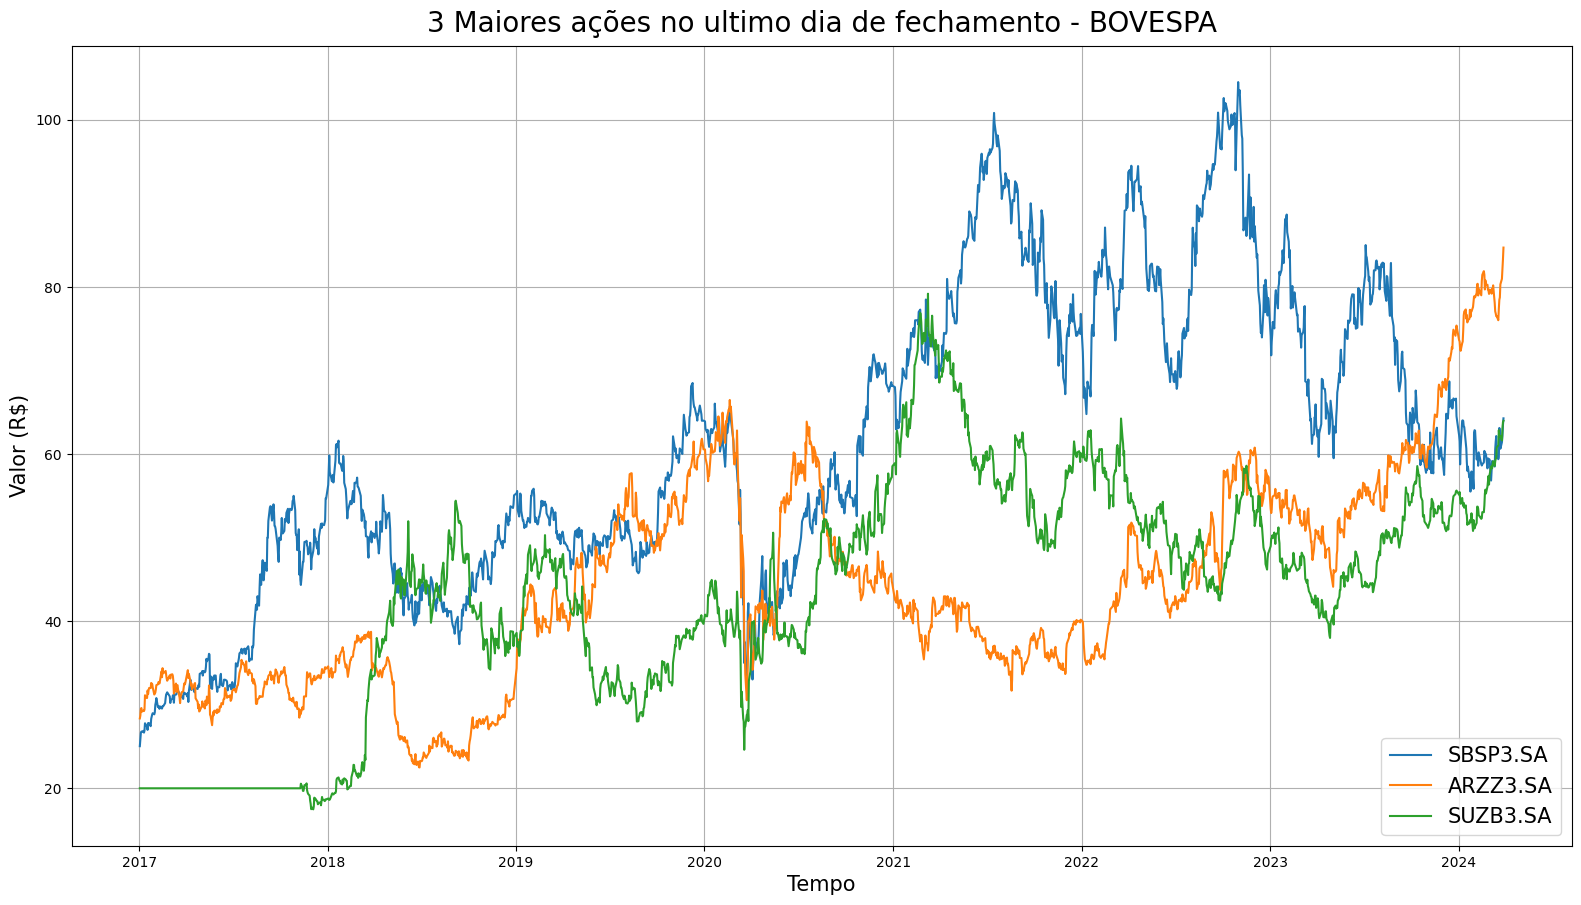

In [111]:
# Plotando as 3 maiores acoes
fig = plt.figure(figsize=(15, 8))
eixo = fig.add_axes([0, 0, 1, 1])

for ticker, valor in maiores_ibov.groupby('Ticker'):
    eixo.plot(valor.index, valor['Close'], label=ticker)

eixo.set_title('3 Maiores ações no ultimo dia de fechamento - BOVESPA', fontsize=20, pad=10)
eixo.set_xlabel('Tempo', fontsize=15)
eixo.set_ylabel('Valor (R$)', fontsize=15)
eixo.legend(lista_maiores_ibov, loc='lower right', fontsize=15)
eixo.grid()

In [132]:
# Pegar o retorno de cada acao
retornos_maiores_ibov = maiores_ibov.groupby('Ticker').apply(lambda x: calculo_retorno(x['Close'])).T # Criando um Dataframe somente com os retornos
retornos_maiores_ibov.dropna(inplace=True) # Tratando a primeira linha nula

# Calcular retornos acumulados começando com 100
valor_inicial = 100
acumulado_maiores_ibov = retornos_maiores_ibov.apply(lambda x: valor_inicial * (1+x).cumprod())
acumulado_maiores_ibov

Ticker,ARZZ3.SA,SBSP3.SA,SUZB3.SA
Date,,,
2017-01-03,103.433136,101.163200,100.000000
2017-01-04,106.387227,104.088826,100.000000
2017-01-05,106.986028,104.370813,100.000000
2017-01-06,106.786430,102.855127,100.000000
2017-01-09,107.305389,103.313354,100.000000
...,...,...,...
2024-03-22,242.075853,283.045473,310.594707
2024-03-25,245.149707,285.371860,307.946018
2024-03-26,248.143720,289.425443,314.692656


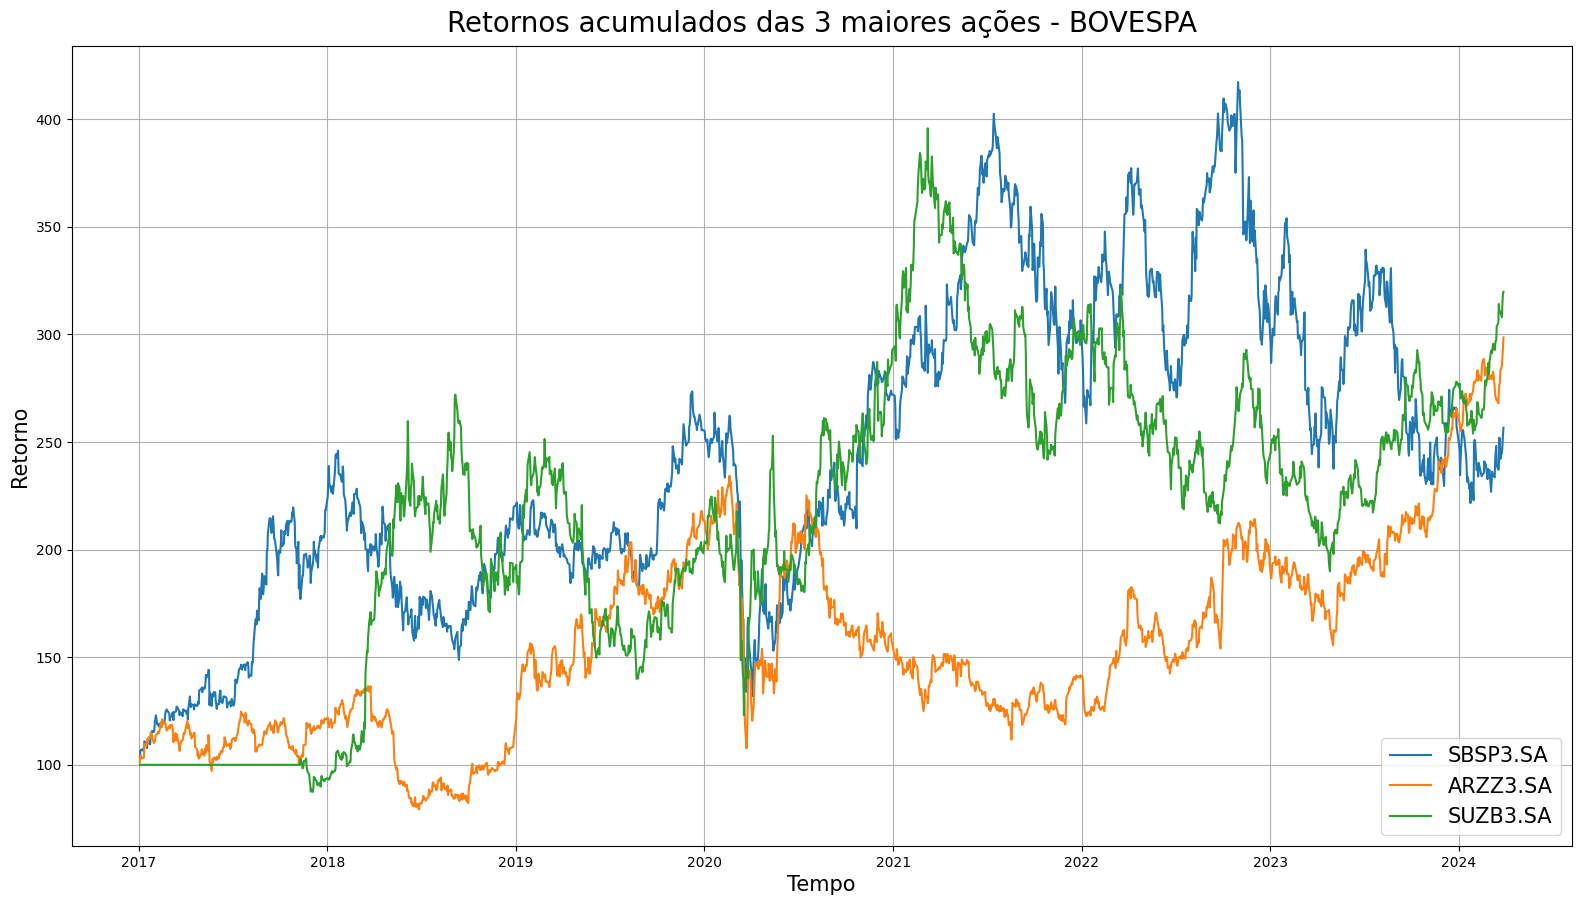

In [68]:
# Plotar retornos acumulados
fig = plt.figure(figsize=(15, 8))
eixo = fig.add_axes([0, 0, 1, 1])

eixo.plot(acumulado_maiores_ibov)
eixo.set_title('Retornos acumulados das 3 maiores ações - BOVESPA', fontsize=20, pad=10)
eixo.set_xlabel('Tempo', fontsize=15)
eixo.set_ylabel('Retorno', fontsize=15)
eixo.legend(lista_maiores_ibov, loc='lower right', fontsize=15)
eixo.grid()

In [69]:
# Juntar dados de retorno com da BOVESPA
acoes_vs_ibov = retornos_maiores_ibov.join(retornos_IBOV, how='outer')
acoes_vs_ibov = acoes_vs_ibov.fillna(0) # Tratando dados nulos (numero de datas pode ser discrepante)
acoes_vs_ibov

Ticker,ARZZ3.SA,SBSP3.SA,SUZB3.SA,^BVSP
Date,,,,
2017-01-03,0.034331,0.011632,0.000000,0.037339
2017-01-04,0.028560,0.028920,0.000000,-0.003640
2017-01-05,0.005629,0.002709,0.000000,0.007826
2017-01-06,-0.001866,-0.014522,0.000000,-0.006541
2017-01-09,0.004860,0.004455,0.000000,0.000568
...,...,...,...,...
2024-03-22,-0.032083,0.019812,0.001773,-0.008833
2024-03-25,0.012698,0.008219,-0.008528,-0.000756
2024-03-26,0.012213,0.014205,0.021909,-0.000536


In [70]:
# Calcular retornos acumulados começando com 100
valor_inicial = 100
acumulado_maiores_versus_ibov = acoes_vs_ibov.apply(lambda x: valor_inicial * (1+x).cumprod())

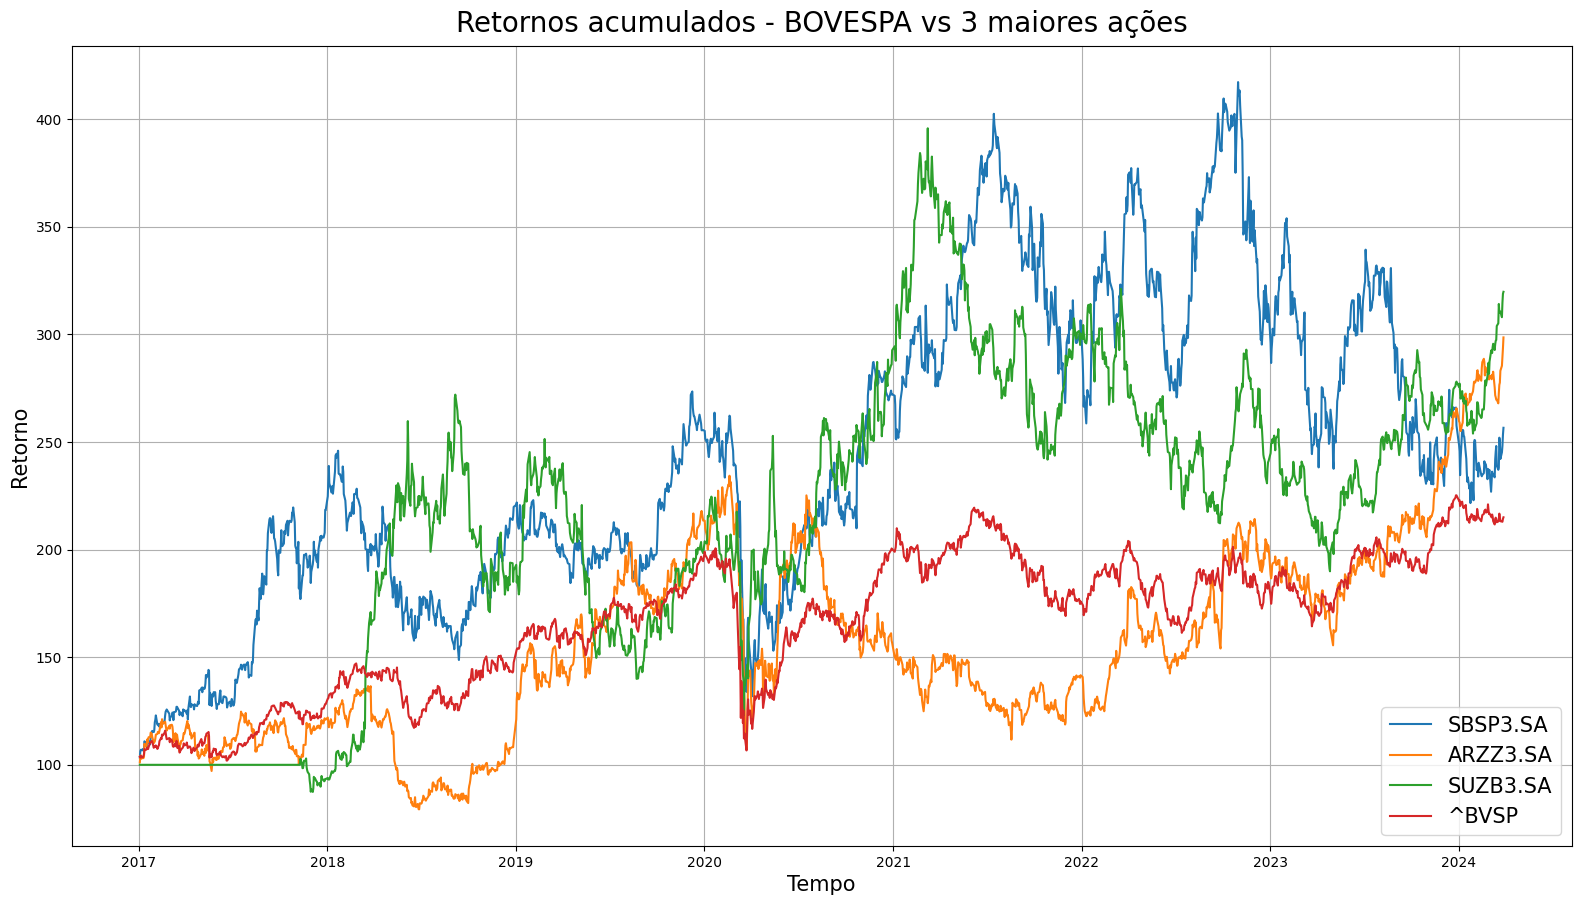

In [71]:
# Plotar retornos acumulados vs bovespa
fig = plt.figure(figsize=(15, 8))
eixo = fig.add_axes([0, 0, 1, 1])

eixo.plot(acumulado_maiores_versus_ibov)
eixo.set_title('Retornos acumulados - BOVESPA vs 3 maiores ações', fontsize=20, pad=10)
eixo.set_xlabel('Tempo', fontsize=15)
eixo.set_ylabel('Retorno', fontsize=15)
eixo.legend(['SBSP3.SA','ARZZ3.SA','SUZB3.SA','^BVSP'], loc='lower right', fontsize=15)
eixo.grid()

In [148]:
## Importando ações do S&P100

# Essa lista foi definida através da Wikipedia
lista_sp100 = ['AAPL', 'ABBV', 'ABT', 'ACN', 'ADBE', 'AIG', 'AMD', 'AMGN', 'AMT', 'AMZN', 'AVGO', 'AXP', 'BA', 'BAC',
               'BK', 'BKNG', 'BLK', 'BMY', 'BRK.B', 'C', 'CAT', 'CHTR', 'CL', 'CMCSA', 'COF', 'COP', 'COST', 'CRM', 'CSCO', 'CVS', 'CVX', 'DE',
               'DHR', 'DIS', 'DOW', 'DUK', 'EMR', 'F', 'FDX', 'GD', 'GE', 'GILD', 'GM', 'GOOG', 'GOOGL', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'INTU',
               'JNJ', 'JPM', 'KHC', 'KO', 'LIN', 'LLY', 'LMT', 'LOW', 'MA', 'MCD', 'MDLZ', 'MDT', 'MET', 'META', 'MMM', 'MO', 'MRK', 'MS',
               'MSFT', 'NEE', 'NFLX', 'NKE', 'NVDA', 'ORCL', 'PEP', 'PFE', 'PG', 'PM', 'PYPL', 'QCOM', 'RTX', 'SBUX', 'SCHW', 'SO', 'SPG',
               'T', 'TGT', 'TMO', 'TMUS', 'TSLA', 'TXN', 'UNH', 'UNP', 'UPS', 'USB', 'V', 'VZ', 'WFC', 'WMT', 'XOM']

dfsp = yf.download(lista_sp100, start = '2017-01-01', end = '2024-04-01')
dfsp = dfsp.stack().reset_index(level=1)
dfsp.columns.name = None
dfsp

[*********************100%%**********************]  101 of 101 completed

1 Failed download:
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')


,Ticker,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2017-01-03,AAPL,26.989267,29.037500,29.082500,28.690001,28.950001,115127600.0
2017-01-03,ABBV,45.028656,62.410000,63.029999,61.939999,62.919998,9328200.0
2017-01-03,ABT,34.127411,39.049999,39.080002,38.340000,38.630001,9677300.0
2017-01-03,ACN,103.765663,116.459999,117.809998,115.820000,117.379997,2351600.0
2017-01-03,ADBE,103.480003,103.480003,104.029999,102.809998,103.430000,2277400.0
...,...,...,...,...,...,...,...
2024-03-28,V,279.079987,279.079987,279.799988,277.119995,278.489990,5844400.0
2024-03-28,VZ,41.291332,41.959999,42.150002,41.630001,41.639999,19771400.0
2024-03-28,WFC,57.959999,57.959999,58.080002,57.560001,57.660000,14619000.0


In [162]:
# Puxando as 3 maiores acoes no ultimo dia de fechamento
lista_maiores_sp100 = dfsp.query('Date == "2024-03-28"').sort_values(by='Close', ascending=False).head(3).Ticker.tolist()

# A ação MHS está dando problemas ao plotar. Será substituída pela próxima maior.
#lista_maiores_sp100 = ['NVR', 'BKNG', 'AZO']

maiores_sp100 = dfsp[dfsp['Ticker'].isin(lista_maiores_sp100)].fillna(0)
maiores_sp100

,Ticker,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2017-01-03,AVGO,140.948013,178.339996,180.899994,176.539993,178.289993,3209800.0
2017-01-03,BKNG,1473.798462,1477.569946,1487.359985,1459.489990,1476.910034,458500.0
2017-01-03,NVDA,25.134886,25.502501,26.592501,24.844999,26.100000,150199600.0
2017-01-04,AVGO,139.944336,177.070007,179.000000,176.679993,178.259995,2396500.0
2017-01-04,BKNG,1483.493774,1487.290039,1493.650024,1480.750000,1484.640015,387700.0
...,...,...,...,...,...,...,...
2024-03-27,BKNG,3673.500000,3673.500000,3711.429932,3656.139893,3677.939941,209200.0
2024-03-27,NVDA,902.500000,902.500000,932.400024,891.229980,931.119995,58606700.0
2024-03-28,AVGO,1325.410034,1325.410034,1330.089966,1311.530029,1317.900024,1985600.0


In [163]:
dfsp.query('Date == "2024-03-28"').sort_values(by='Close', ascending=False).head(3).Ticker.tolist()

['BKNG', 'AVGO', 'NVDA']

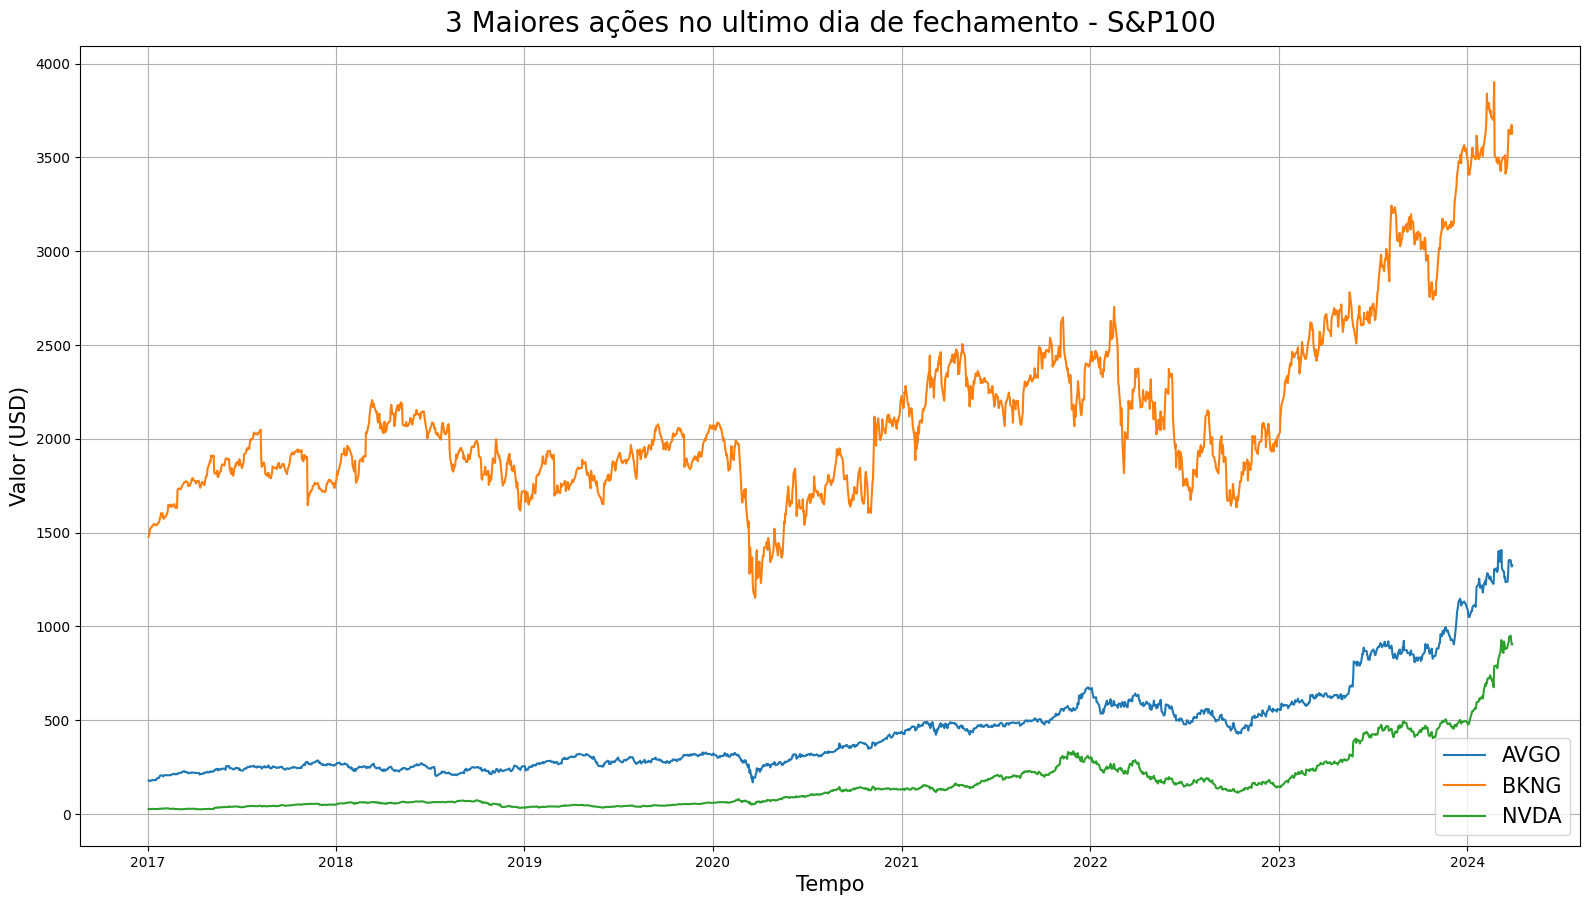

In [165]:
# Plotando as 3 maiores acoes
fig = plt.figure(figsize=(15, 8))
eixo = fig.add_axes([0, 0, 1, 1])

for ticker, valor in maiores_sp100.groupby('Ticker'):
    eixo.plot(valor.index, valor['Close'], label=ticker)

eixo.set_title('3 Maiores ações no ultimo dia de fechamento - S&P100', fontsize=20, pad=10)
eixo.set_xlabel('Tempo', fontsize=15)
eixo.set_ylabel('Valor (USD)', fontsize=15)
eixo.legend(['AVGO', 'BKNG', 'NVDA'], loc='lower right', fontsize=15)
eixo.grid()

In [191]:
# Pegar o retorno de cada acao
retornos_maiores_sp100 = maiores_sp100.groupby('Ticker').apply(lambda x: calculo_retorno(x['Close'])).T # Criando um Dataframe somente com os retornos
retornos_maiores_sp100.dropna(inplace=True) # Tratando a primeira linha nula

# Calcular retornos acumulados começando com 100
valor_inicial = 100
acumulado_maiores_sp100 = retornos_maiores_sp100.apply(lambda x: valor_inicial * (1+x).cumprod())
acumulado_maiores_sp100

Ticker,AVGO,BKNG,NVDA
Date,,,
2017-01-04,99.287883,100.657843,102.333102
2017-01-05,97.723451,101.768445,99.735316
2017-01-06,99.018728,102.910184,101.068519
2017-01-09,99.231807,103.524034,105.166157
2017-01-10,101.250427,103.903711,104.372119
...,...,...,...
2024-03-22,758.926768,245.316981,3697.245348
2024-03-25,757.866987,245.466548,3725.203410
2024-03-26,746.602006,247.777108,3629.487172


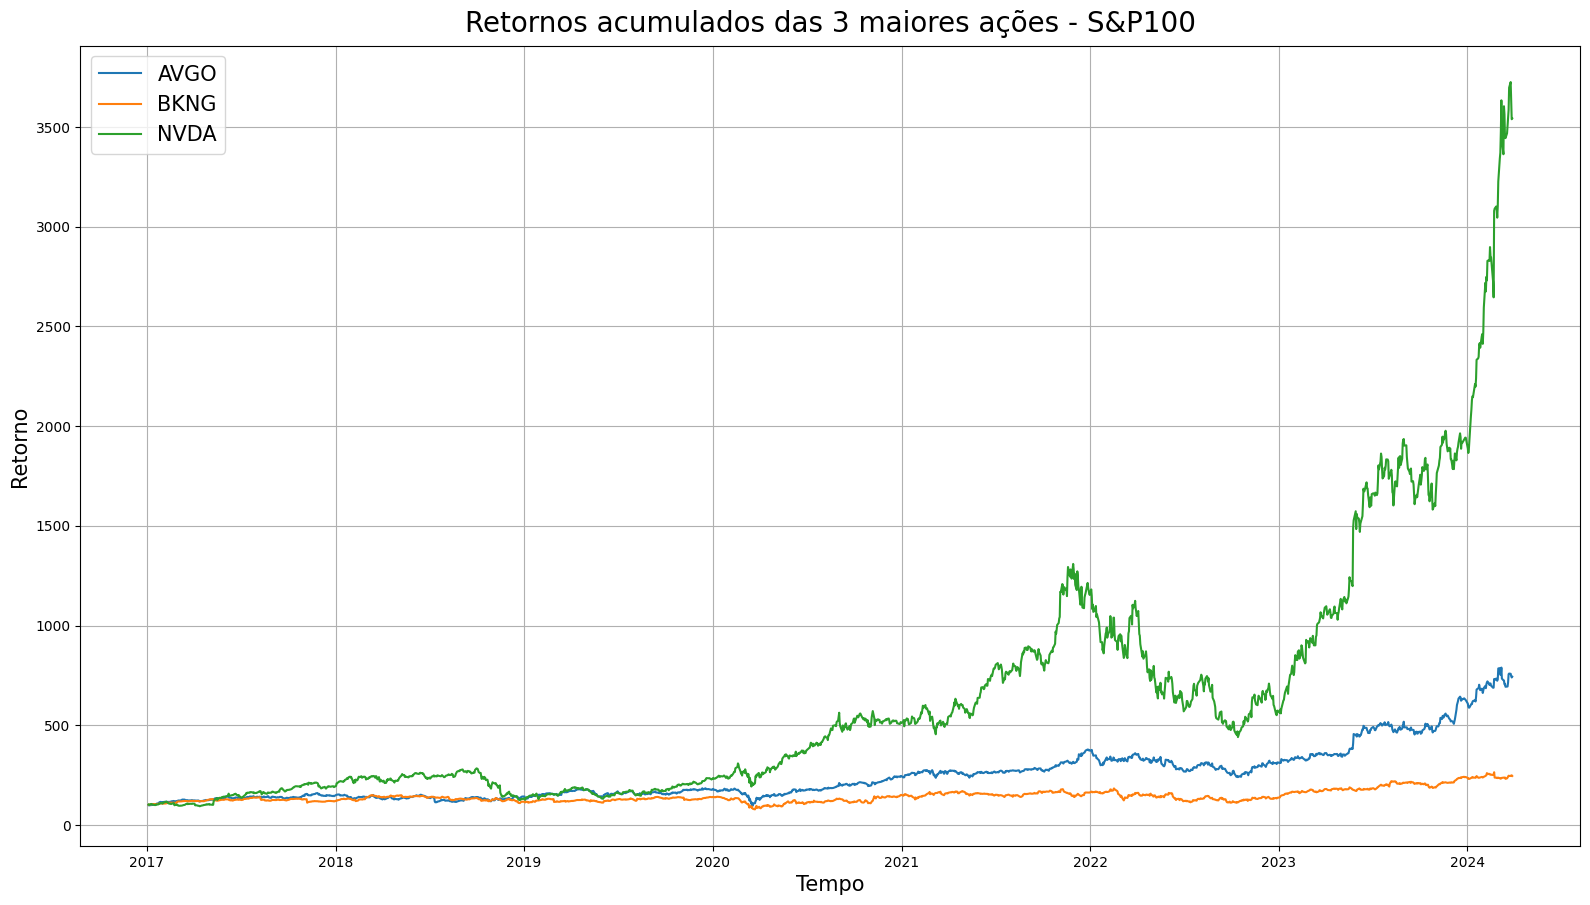

In [192]:
# Plotar retornos acumulados
fig = plt.figure(figsize=(15, 8))
eixo = fig.add_axes([0, 0, 1, 1])

eixo.plot(acumulado_maiores_sp100)
eixo.set_title('Retornos acumulados das 3 maiores ações - S&P100', fontsize=20, pad=10)
eixo.set_xlabel('Tempo', fontsize=15)
eixo.set_ylabel('Retorno', fontsize=15)
eixo.legend(['AVGO', 'BKNG', 'NVDA'], loc='upper left', fontsize=15)
eixo.grid()

In [175]:
retornos_SP100

Ticker,^SP100
Date,
2017-01-04,0.003268
2017-01-05,0.000269
2017-01-06,0.003993
2017-01-09,-0.002480
2017-01-10,-0.001154
...,...
2024-03-22,0.000634
2024-03-25,-0.003206
2024-03-26,-0.003646


In [178]:
# Juntar dados de retorno com da S&P100
acoes_vs_sp100 = retornos_maiores_sp100.join(retornos_SP100, how='outer')
acoes_vs_sp100 = acoes_vs_sp100.fillna(0) # Tratando dados nulos (numero de datas pode ser discrepante)

In [177]:
# Calcular retornos acumulados começando com 100
valor_inicial = 100
acumulado_maiores_versus_sp100 = acoes_vs_sp100.apply(lambda x: valor_inicial * (1+x).cumprod())
acumulado_maiores_versus_sp100

Ticker,AVGO,BKNG,NVDA,^SP100
Date,,,,
2017-01-04,99.287883,100.657843,102.333102,100.326806
2017-01-05,97.723451,101.768445,99.735316,100.353792
2017-01-06,99.018728,102.910184,101.068519,100.754552
2017-01-09,99.231807,103.524034,105.166157,100.504702
2017-01-10,101.250427,103.903711,104.372119,100.388768
...,...,...,...,...
2024-03-22,758.926768,245.316981,3697.245348,247.793322
2024-03-25,757.866987,245.466548,3725.203410,246.998804
2024-03-26,746.602006,247.777108,3629.487172,246.098343


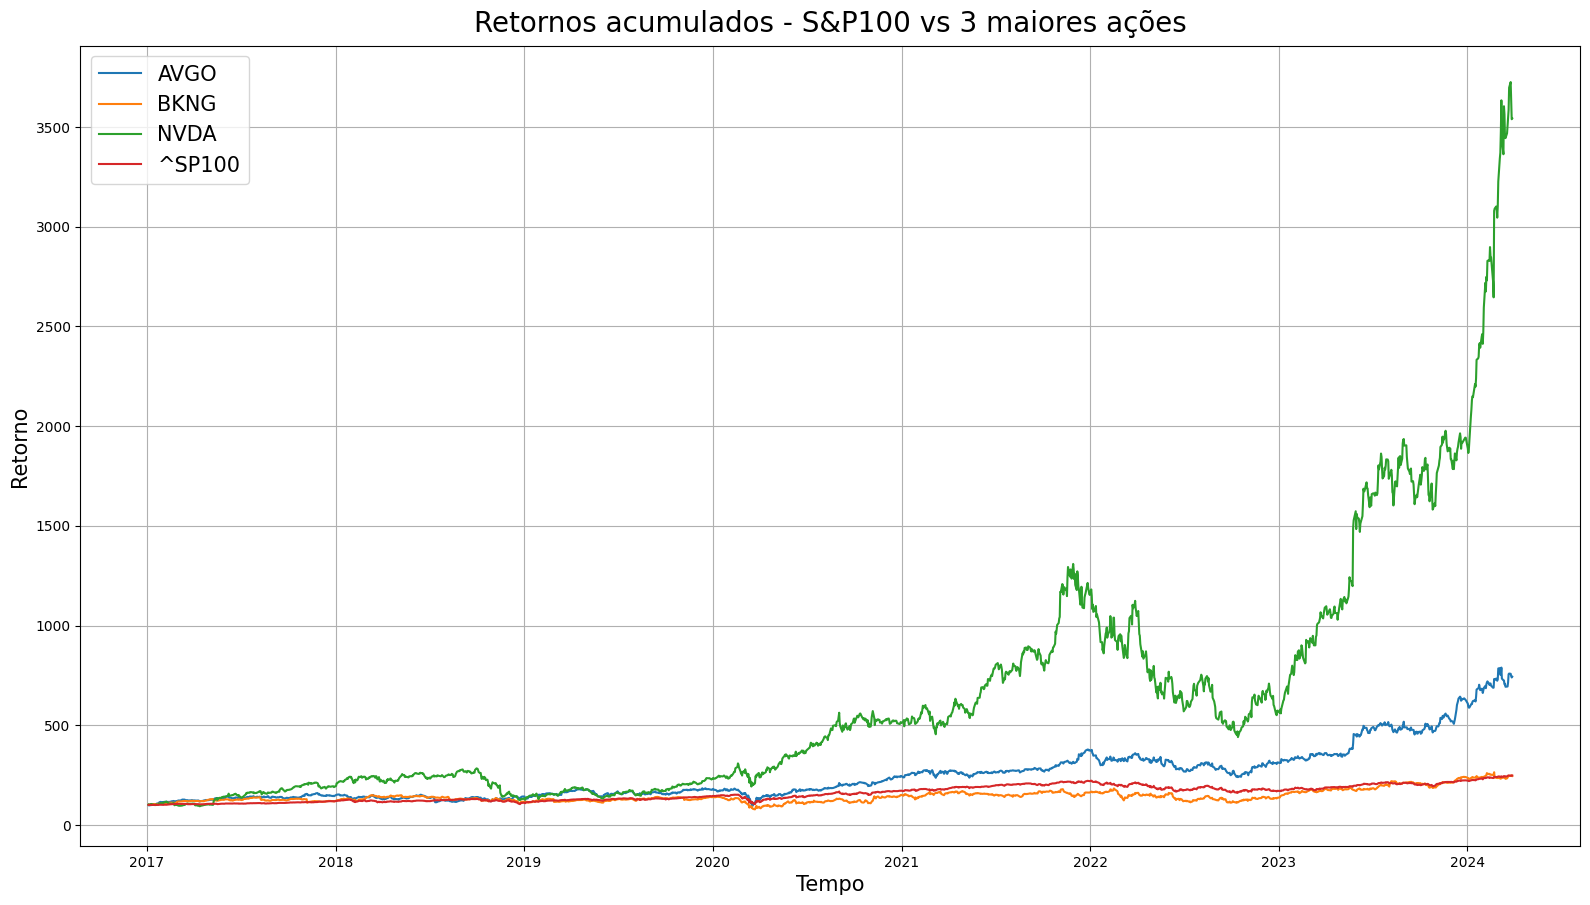

In [193]:
# Plotar retornos acumulados vs S&P100
fig = plt.figure(figsize=(15, 8))
eixo = fig.add_axes([0, 0, 1, 1])

eixo.plot(acumulado_maiores_versus_sp100)
eixo.set_title('Retornos acumulados - S&P100 vs 3 maiores ações', fontsize=20, pad=10)
eixo.set_xlabel('Tempo', fontsize=15)
eixo.set_ylabel('Retorno', fontsize=15)
eixo.legend(['AVGO', 'BKNG', 'NVDA', '^SP100'], loc='upper left', fontsize=15)
eixo.grid()